Introduction
=============
What is the context of the work? What research question are you trying to answer? What are your main findings?

Data Description
=============
Answer the following questions:
* What are the observations (rows) and the attributes (columns)?
* Why was this dataset created?
* Who funded the creation of the dataset?
* What processes might have influenced what data was observed and recorded and what was not?
* What preprocessing was done, and how did the data come to be in the form that you are using?
* If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
* Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 


Data Analysis
=============
* Use summary functions like mean and standard deviation along with visual displays like scatter plots and histograms to describe data.
* Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [128]:
#Load dataframe and display first five observations
Comedy_Lines_Year_vs_Gender = pd.read_csv('Comedy_Lines_Year_vs_Gender.csv')
Comedy_Lines_Year_vs_Gender.head()

,Year,Male Lines,Female Lines
0,1931,368,77
1,1932,218,193
2,1933,155,0
3,1934,1110,902
4,1936,498,147


<br/>

Our first idea was to test whether there was a relationship between time and the number of lines males/females blah blah. So we graphed the two vs. time to get an initial indication if this was worth exploring

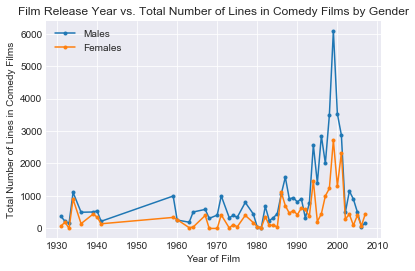

In [41]:
plt.style.use('seaborn-darkgrid')

plt.plot(Comedy_Lines_Year_vs_Gender['Year'],Comedy_Lines_Year_vs_Gender['Male Lines'], marker = '.', label = 'Males')
plt.plot(Comedy_Lines_Year_vs_Gender['Year'],Comedy_Lines_Year_vs_Gender['Female Lines'], marker = '.', label = 'Females')
plt.xlabel("Year of Film")
plt.ylabel("Total Number of Lines in Comedy Films")
plt.title("Film Release Year vs. Total Number of Lines in Comedy Films by Gender")
plt.legend()
print('\n')
plt.show()
print('\n')

Doesn't really look like shits goin on, lets check if there's any sort of correlation

<br/>

In [22]:
male_corrcoef = np.corrcoef(Comedy_Lines_Year_vs_Gender['Year'],Comedy_Lines_Year_vs_Gender['Male Lines'])[0][1]
female_corrcoef = np.corrcoef(Comedy_Lines_Year_vs_Gender['Year'],Comedy_Lines_Year_vs_Gender['Female Lines'])[0][1]

print("The correlation coefficient for film release year vs. male lines in comedies = ",  round(male_corrcoef,3))
print("The correlation coefficient for film release year vs. female lines in comedies = ",  round(female_corrcoef,3))

The correlation coefficient for film release year vs. male lines in comedies =  0.386
The correlation coefficient for film release year vs. female lines in comedies =  0.352


This is low, but not terrible. Fit linear regression and see what the $r^2$ looks like

In [27]:
male_model = LinearRegression().fit(Comedy_Lines_Year_vs_Gender[['Year']],Comedy_Lines_Year_vs_Gender['Male Lines'])
female_model = LinearRegression().fit(Comedy_Lines_Year_vs_Gender[['Year']],Comedy_Lines_Year_vs_Gender['Female Lines'])


female_score = female_model.score(Comedy_Lines_Year_vs_Gender[['Year']],Comedy_Lines_Year_vs_Gender['Female Lines'])
male_score = male_model.score(Comedy_Lines_Year_vs_Gender[['Year']],Comedy_Lines_Year_vs_Gender['Male Lines'])

print("The r^2 score for film release year vs. male lines in comedies = ",  round(male_score,3))
print("The r^2 score for film release year vs. female lines in comedies = ",  round(female_score,3))

The r^2 score for film release year vs. male lines in comedies =  0.149
The r^2 score for film release year vs. female lines in comedies =  0.124


Also trash, unlikely we were going to find jack shit. What about female lines vs. male lines in a given year? Can we predict the amount of lines a males will have in comedies in a given year given female lines? We plotted this first 

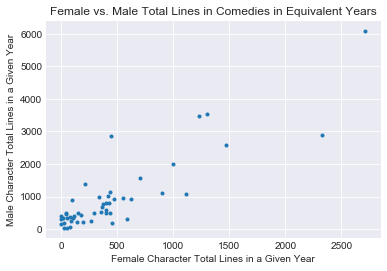

In [30]:
plt.style.use('seaborn-darkgrid')
plt.scatter(Comedy_Lines_Year_vs_Gender['Female Lines'],Comedy_Lines_Year_vs_Gender['Male Lines'], marker = '.')
plt.xlabel("Female Character Total Lines in a Given Year")
plt.ylabel("Male Character Total Lines in a Given Year")
plt.title("Female vs. Male Total Lines in Comedies in Equivalent Years")
plt.show()

Aha! Looks roughly linear, lets see what each looks like indivually

In [58]:
male_mean = Comedy_Lines_Year_vs_Gender['Male Lines'].mean()
male_std = Comedy_Lines_Year_vs_Gender['Male Lines'].std()

female_mean = Comedy_Lines_Year_vs_Gender['Female Lines'].mean()
female_std = Comedy_Lines_Year_vs_Gender['Female Lines'].std()
r = np.corrcoef(Comedy_Lines_Year_vs_Gender['Female Lines'],Comedy_Lines_Year_vs_Gender['Male Lines'])[0][1]
cov = np.cov(Comedy_Lines_Year_vs_Gender['Female Lines'],Comedy_Lines_Year_vs_Gender['Male Lines'])[0][1]

print ('Average number of lines per year for male characters in comedies  = ', round(male_mean,3))
print ('Average number of lines per year for female characters in comedies  = ', round(female_mean,3))
print('\n')
print('Standard deviation of lines per year for male characters in comedies = ', male_std)
print('Standard deviationof lines per year for female characters in comedies = ', female_std)
print('\n')
print('The pearson correlation coefficient between total lines for male characters \nand total lines for female characters is comedy films is = ',round(r,3))
print('\n')
print('The covarience of total lines for male characters \nand total lines for female characters is comedy films is = ',round(cov,3))

Average number of lines per year for male characters in comedies  =  966.816
Average number of lines per year for female characters in comedies  =  458.857


Standard deviation of lines per year for male characters in comedies =  1140.170120228216
Standard deviationof lines per year for female characters in comedies =  561.4687213015521


The pearson correlation coefficient between total lines for male characters 
and total lines for female characters is comedy films is =  0.873


The covarience of total lines for male characters 
and total lines for female characters is comedy films is =  559018.432


Say some shit about the means, stds. The corr and cov

In [63]:
f_vs_m = LinearRegression().fit(Comedy_Lines_Year_vs_Gender[['Female Lines']],Comedy_Lines_Year_vs_Gender['Male Lines'])
r_sq = f_vs_m.score(Comedy_Lines_Year_vs_Gender[['Female Lines']],Comedy_Lines_Year_vs_Gender['Male Lines'])
model_coef = f_vs_m.coef_[0]
model_intercept = f_vs_m.intercept_

print("The intercept for female vs. male total lines in comedies in equivalent years = ", round(model_intercept,3))
print("The coefficient for female vs. male total lines in comedies in equivalent years = ", round(model_coef,3))
print("The r^2 score for female vs. male total lines in comedies in equivalent years = ", round(r_sq,3))

The intercept for female vs. male total lines in comedies in equivalent years =  153.138
The coefficient for female vs. male total lines in comedies in equivalent years =  1.773
The r^2 score for female vs. male total lines in comedies in equivalent years =  0.763


This is pretty decent, 76.3% of variation can be explained by our model, which isn't too shabby at all.  Every one line increase for females equates to 1.773 line increase for males, means females have about 56% of the number of lines that males do. If 0 female lines, can expect ~153 male lines.

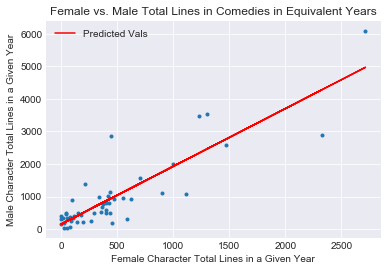

In [67]:
plt.style.use('seaborn-darkgrid')

predicted_male_lines = f_vs_m.predict(Comedy_Lines_Year_vs_Gender[['Female Lines']])


plt.scatter(Comedy_Lines_Year_vs_Gender['Female Lines'],Comedy_Lines_Year_vs_Gender['Male Lines'], marker = '.')
plt.plot(Comedy_Lines_Year_vs_Gender[['Female Lines']], predicted_male_lines, color = 'r', label = 'Predicted Vals')
plt.xlabel("Female Character Total Lines in a Given Year")
plt.ylabel("Male Character Total Lines in a Given Year")
plt.title("Female vs. Male Total Lines in Comedies in Equivalent Years")
plt.legend()
plt.show()

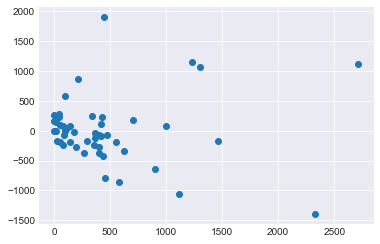

In [70]:
residuals = Comedy_Lines_Year_vs_Gender['Male Lines'] - predicted_male_lines
plt.scatter(Comedy_Lines_Year_vs_Gender['Female Lines'],residuals)
plt.show()

Residuals show an increasing trend. 

In [76]:
residual_std = np.sqrt(sum((residuals**2))/(len(Comedy_Lines_Year_vs_Gender['Male Lines'])-2))
print("The standard deviation of the residuals = ", round(residual_std,3))

The standard deviation of the residuals =  561.485


Evaluation of Significance
=============
* Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness. 


In [89]:
def permuted_y():
    return np.random.permutation(Comedy_Lines_Year_vs_Gender['Male Lines'].copy())

permuted_stuff = np.zeros(10000)
for i in range(0,10000):
    model = LinearRegression().fit(Comedy_Lines_Year_vs_Gender[['Female Lines']],permuted_y())
    model_co = model.coef_
    permuted_stuff[i] = float(model_co)

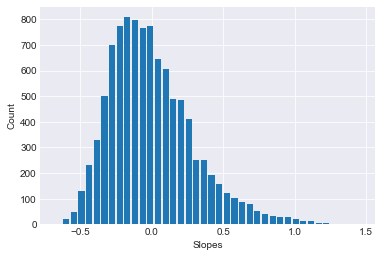

In [139]:
plt.hist(permuted_stuff, rwidth = .8, bins = 40)
plt.xlabel("Slopes")
plt.ylabel("Count")
plt.show()

In 10000 trials, not a single permutation of male lines yielded a regression coefficient that was equal to or greater than what we found. It is very very unlikely the relationship we found was due to chance 

In [138]:
denom = sum((Comedy_Lines_Year_vs_Gender['Female Lines']-female_mean)**2)
SE = residual_std / np.sqrt(denom)
t_test = model_coef/SE

#### Hypothesis Test ####

1.)
* H<sub>o</sub>: $\rho$ = 0
* H<sub>a</sub>: $\rho$ $\neq$ 0

2.) 
* $\alpha$ = .05

3.) 
* t<sub>test</sub> = $\frac{Slope}{Slope Standard Error}$ = $ \frac{\beta_1} {\sqrt{\frac{\frac{\sum{(Y_i-\hat{Y_i})^2}}{N-2}}{\sum{(X_i-\bar{X})}}}}$
* *df = N - 2 = 47*

4.)
* Reject H<sub>o</sub> if t<sub>test</sub> > 2.0117

5.) 
*  t<sub>test</sub> = 12.285 → *Reject H<sub>o</sub> at $\alpha$ = .05*

6.)
* There is a significant linear trend

Conclusion
=============
* What did you find over the course of your data analysis, and how confident are you in these conclusions? Interpret these results in the wider context of the real-life application from where your data hails.
